In [1]:
print("ola eu sou a bea")

ola


In [1]:
print("tou me a passar")

tou me a passar


Text Mining project


In [23]:
#!pip install langdetect

import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
train_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\train.xlsx'
train_reviews_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\train_reviews.xlsx'
test_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\test.xlsx'
test_reviews_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\test_reviews.xlsx'

train = pd.read_excel(train_path)
train_reviews = pd.read_excel(train_reviews_path)
test = pd.read_excel(test_path)
test_reviews = pd.read_excel(test_reviews_path)

# sou noob e nunca sei fazer isto de maneira melhor desculpem 

In [3]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [4]:
train.set_index('index', inplace=True)
train_reviews.set_index('index', inplace=True)
test.set_index('index', inplace=True)
test_reviews.set_index('index', inplace=True)

In [5]:
train.head()

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [6]:
train = train.copy()
train_reviews = train_reviews.copy()
test = test.copy()
test_reviews = test_reviews.copy()

In [7]:
print(train.shape)
print(test.shape)

(6248, 3)
(695, 2)


In [8]:
train.duplicated().sum()

192

In [9]:
train_reviews.duplicated().sum()

6781

In [10]:
test.duplicated().sum()

4

In [11]:
test_reviews.duplicated().sum()

438

i guess que apagamos todos os duplicados? 

In [12]:
train.isna().sum()

description    0
host_about     0
unlisted       0
dtype: int64

In [13]:
train_reviews.isna().sum()

comments    0
dtype: int64

In [14]:
test.isna().sum()

description    0
host_about     0
dtype: int64

In [15]:
test_reviews.isna().sum()

comments    0
dtype: int64

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
unlisted,6248.0,0.273367,0.445724,0.0,0.0,0.0,1.0,1.0


In [17]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

train["language"] = train["description"].apply(detect_language)
train.head()

,description,host_about,unlisted,language
index,,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr


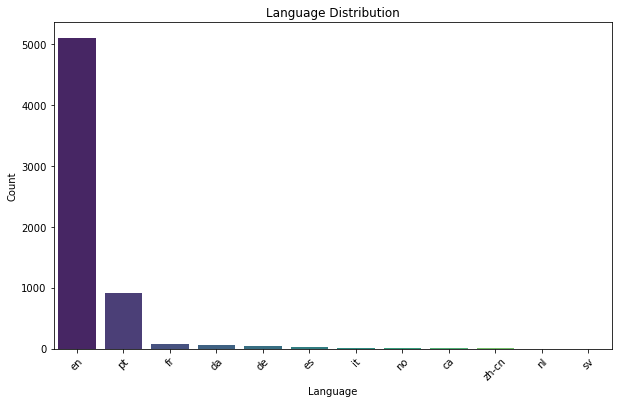

In [18]:
language_counts = train["language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [19]:
train["language"].unique()

array(['en', 'pt', 'fr', 'es', 'de', 'no', 'da', 'sv', 'it', 'ca',
       'zh-cn', 'nl'], dtype=object)

'en': English 
'pt': Portuguese
'fr': French
'es': Spanish
'de': German
'da': Danish
'no': Norwegian
'sv': Swedish
'it': Italian
'ca': Catalan
'zh-cn': Chinese (Simplified)
'nl': Dutch

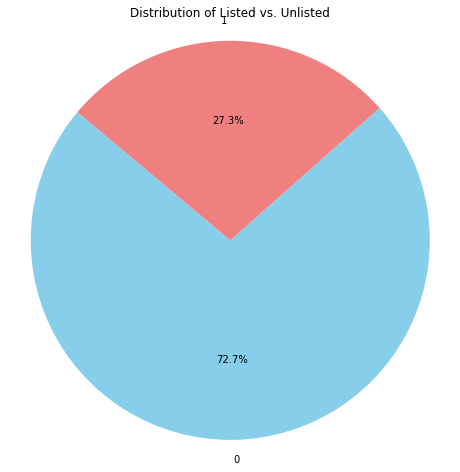

In [20]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

In [25]:
def find_unique_matches(data, column):
    # Convert column data to string type (handle NaN values gracefully)
    column_data = data[column].astype(str)
    
    # Concatenate all comments into a single string
    all_comments = ' '.join(column_data)
    
    # Define a regular expression pattern to match small words and punctuation marks
    pattern = r'\b\w{1,2}\b|[^\w\s]'
    
    # Find all matches of the pattern in the concatenated string
    matches = re.findall(pattern, all_comments)
    
    # Return unique matches using a set comprehension
    return set(matches)


unique_matches = find_unique_matches(train_reviews, 'comments')

# Print the unique small words and punctuation marks
print("Unique small words and punctuation marks:")
print(list(unique_matches))


Unique small words and punctuation marks:
['고', 'И', '7h', 'yn', '분임', 'k', '치고', 'Ah', '글을', 'cc', 'sì', 'ㅜㅜ', 'Sė', '五星', 'Là', '热情', '4d', 'SO', '넘어', '소형', '찾던', 'ne', 'D', 'x', 'io', '맛이', '복층', '钱包', 'Ai', '위의', '2c', 'Av', '외부', 'lé', 'Ju', 'kw', '벽도', '짧지', '四楼', 'й', '词典', '조곰', '공간', 'LM', '겁나', 'øl', 'Is', '에어', '핸들', '》', 'ㅐ비', 'M', '한참', '¡', '평졈', '묵고', '🛏', '잠이', '창은', '전체', '够热', 'tp', 'MA', '집들', '남을', 'ΣΕ', '🤔', '🧐', '창도', '갔덙', 'ㅏ란', '�', 'Fe', '첫', '작고', '쥬고', 'Et', 'ㅓ', '낯선', '비용', '💍', '潮湿', '쫍은', '멋짐', '뷰를', 'er', '들지', '油', '有2', '구분', '3h', '탈수', '4시', '오일', 'CH', '👐', '跟', '😭', 'το', '풀', '購物', '不錯', '고루', '방식', '법과', '만두', '등도', '‼', '칼', '20', '77', 'cç', '😖', '整齊', '얻기', '82', '끈뎨', '묵는', 'zo', '없기', '과거', 'oF', 'בו', 'ír', '꼐딴', 'jn', 'ma', '야간', '몸을', 'Pt', 'ES', '목욕', '쉽지', '细心', '묵다', 'rd', '짐도', 'yı', '«', '남', '됨안', '단', '好', '어쩔', '쥔쨔', 'A5', '🇩', '́', '납븐', 'os', '쬬쿪', 'JK', '채광', '대해', '출발', '67', '빵읺', '🍪', 'на', '이불', '1H', '키를', 'nB', 'SÅ', 'Ça'